In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (12.0, 7.0)

## Συναρτήσεις μεθόδων αριθμητικής ολοκλήρωσης
Θα χρησιμοποιήσουμε τις μεθόδους αριθμητικής ολοκλήρωσης Euler και Runge Kutta 4ης τάξης να να προσομοιώσουμε τη κίνηση ενός βλήματος που εκτοξέυεται υπο γωνία $\phi$ αρχικά χωρίς τριβή και στη συνέχεια με τριβή ανάλογη της ταχύτητας.
Και στις δύο μεθόδους δίνουμε την διαφορική συνάρτηση σε μορφή πίνακα. Δηλαδή λύνουμε το σύστημα:
$$
\dot{\mathbf{X}}=
\begin{pmatrix}
\dot{x} \\ \dot{u}_x
\end{pmatrix}=
\begin{pmatrix}
u_x \\ 0
\end{pmatrix}
$$
και
$$
\dot{\mathbf{Y}}=
\begin{pmatrix}
\dot{y} \\ \dot{u}_y
\end{pmatrix}
=
\begin{pmatrix}
u_y \\ -g
\end{pmatrix}
$$
### Μέθοδος Euler
$$
\begin{pmatrix}
x_{i+1} \\ u_{x,i+1}
\end{pmatrix}=
\begin{pmatrix}
x_{i} \\u_{x,i}
\end{pmatrix}+
\begin{pmatrix}
u_{x,i} \\ 0
\end{pmatrix} dt
$$

* Δημιουργούμε τις συναρτήσεις που θα δέχονται σαν είσοδο τη διαφορική συνάρτηση df, τις αρχικες τίμες y0 και ένα πίνακα των χρόνων για τους οποίους ολοκληρώνουμε T.

* Η διαφορική συνάρτηση df για να ολοκληρωθεί θα πρέπει να δέχεται σαν ορίσματα το χρόνο (ανεξαρτήτως αν είναι χρονοανεξάρτητη) και τις τιμές θέσης/ταχύτητας και να επιστρέφει σαν απότελεσμα τις παραγώγους τους σε μορφή πίνακα.

In [4]:
def Euler(df,y0,T): 
    y=np.array(y0,ndmin=2) #Αρχικές τιμές (πίνακας θέσης,ταχύτητας)
    dt=T[2]-T[1] #step size
    for i,t in enumerate(T[1:]):
        y=np.vstack((y,y[-1]+df(t,y[-1][0],y[-1][1])*dt)) #Μέθοδος Euler
    return y
def RungeKutta(df,y0,T):
    y=np.array(y0,ndmin=2)
    dt=T[2]-T[1]
    for i,t in enumerate(T[1:]):
        k1=df(t,y[-1][0],y[-1][1])
        k2=df(t+dt*0.5,y[-1][0]+k1[0]*0.5*dt,y[-1][1]+k1[1]*0.5*dt)
        k3=df(t+dt*0.5,y[-1][0]+k2[0]*0.5*dt,y[-1][1]+k2[1]*0.5*dt)
        k4=df(t+dt,y[-1][0]+k3[0]*dt,y[-1][1]+k3[1]*dt)
        y=np.vstack((y,y[-1]+(k1+2.*k2+2.*k3+k4)/6 *dt))
    return y

In [5]:
#====Αρχικές συνθήκες==========
g=10.
x0,y0=0.,0.
u0x,u0y=20.*np.cos(np.pi/3.),20.*np.sin(np.pi/3.) #γωνια pi/3

In [6]:
def dux(t,x,ux): return np.array([ux,0])
def duy(t,y,uy): return np.array([uy,-g])

In [7]:
T=np.arange(0,3.6,0.1)
Xe = Euler(dux,np.array([x0,u0x]),T)
Ye = Euler(duy,np.array([y0,u0y]),T)
Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
Yrk = RungeKutta(duy,np.array([y0,u0y]),T)
xr=x0+u0x*T
yr=y0+u0y*T-0.5*g*T**2

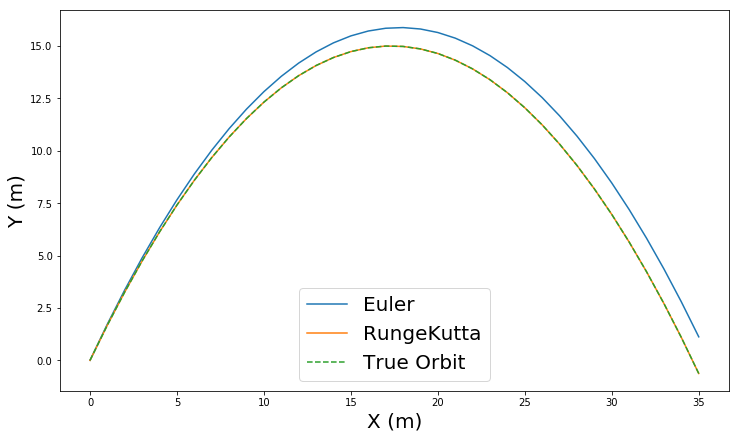

In [8]:
plt.plot(Xe[:,0],Ye[:,0],label='Euler')
plt.plot(Xrk[:,0],Yrk[:,0],label='RungeKutta')
plt.plot(xr,yr,'--',label='True Orbit')
plt.xlabel('X (m)',fontsize=20)
plt.ylabel('Y (m)',fontsize=20)
plt.legend(fontsize=20)

Στη περίπτωση τριβής ανάλογης της ταχύτητας, το σύστημα γράφεται:
$$
\mathbf{X}=
\begin{pmatrix}
\dot{x} \\ \dot{u}_x
\end{pmatrix}=
\begin{pmatrix}
u_x \\ -Α u_x
\end{pmatrix}
$$
και
$$
\mathbf{Y}=
\begin{pmatrix}
\dot{y} \\ \dot{u}_y 
\end{pmatrix}
=
\begin{pmatrix}
u_y \\ -g -Α u_y
\end{pmatrix}
$$

In [9]:
A=5.
def dux(t,x,ux): return np.array([ux,-A*ux])
def duy(t,y,uy): return np.array([uy,-g-A*uy])

0.0 2.70138683146
0.10471975512 3.55879810475
0.209439510239 3.77870790125
0.314159265359 3.76196450153
0.418879020479 3.63924783915
0.523598775598 3.45820001809
0.628318530718 3.23376976728
0.733038285838 2.97169926933
0.837758040957 2.67614812868
0.942477796077 2.35096501819
1.0471975512 1.99991986757
1.15191730632 1.6269070352
1.25663706144 1.23604733255
1.36135681656 0.831635945519
1.46607657168 0.41810905346


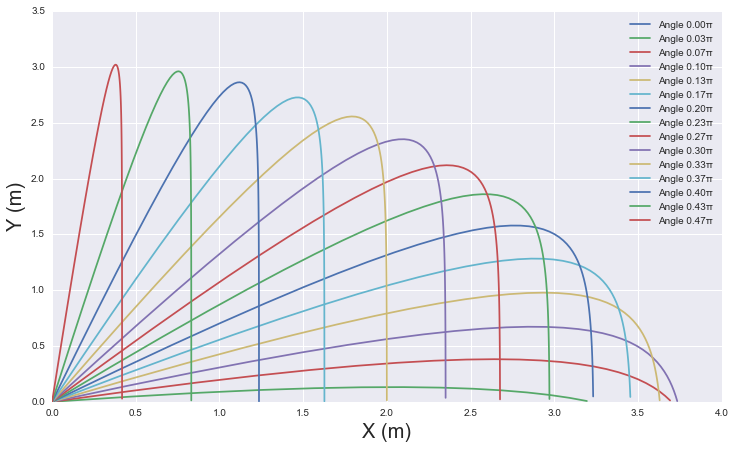

In [15]:
T=np.arange(0,10.,0.025)
e=0.2
for phi in np.arange(0.,np.pi/2,np.pi/30):
    g=10.
    x0,y0=0.,0.
    u0x,u0y=20.*np.cos(phi),20.*np.sin(phi)
    Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
    Yrk = RungeKutta(duy,np.array([y0,u0y]),T)
    print(phi,Xrk[:,0][np.logical_and(Yrk[:,0]>0.-e,Yrk[:,0]<0.+e)][-1]) #εύρεση βεληνεκούς
    plt.plot(Xrk[:,0][Yrk[:,0]>=0],Yrk[:,0][Yrk[:,0]>=0],label=u'Angle {:.2f}π'.format(phi/np.pi))
plt.xlabel('X (m)',fontsize=20)
plt.ylabel('Y (m)',fontsize=20)
plt.legend(fontsize=10,loc='best')